## import HDF5 files

1.Hierarchical Data Format version 5
2.Standard for storing large quantities of numerical data
3.Datasets can be hundreds of gigabytes or terabytes
4.HDF5 can scale to exabytes
5.For more refer: <a>https://support.hdfgroup.org/HDF5/examples/intro.html#python</a>
6.It is open source and visit Official website here
<a>https://www.hdfgroup.org/</a>

In [4]:
import os

os.chdir("E:\\D-drive\\DS\\data\\01 DS ML DL NLP and AI With Python Lab Copy\\02.LabData")

### 2. Work with HDF5 file

#### 2.1 Import Required Packages

In [5]:
import numpy as np;
import h5py;
import matplotlib.pyplot as plt

#### 2.2 Load File

In [6]:
data = h5py.File('LIGO_data.hdf5', 'r') # Load file: data
print(type(data))  #<class 'h5py._hl.files.File'>  # Print the datatype of the loaded file

<class 'h5py._hl.files.File'>


#### 2.3 Print the keys of the file

In [7]:
for key in data.keys():
    print(key)    # meta , quality and strain

meta
quality
strain


#### 2.4 Get the HDF5 group: group

In [8]:
group = data['strain']
group

<HDF5 group "/strain" (1 members)>

In [9]:
# Check out keys of group
for key in group.keys():
    print(key)

Strain


In [10]:
strain = data['strain']['Strain'].value # Set variable equal to time series data: strain
num_samples = 10000 # Set number of time points to sample: num_Samples
time = np.arange(0, 1, 1/num_samples) # Set time vector

#### 2.5. Plot data

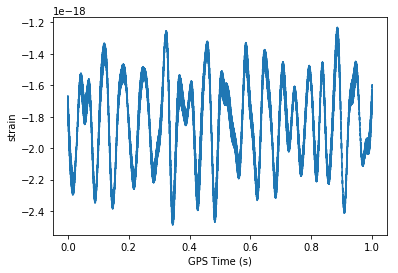

In [11]:
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)') ; plt.ylabel('strain') ; plt.show()

In [1]:
import os

os.chdir("E:\\D-drive\\DS\\data\\01 DS ML DL NLP and AI With Python Lab Copy\\02.LabData")

In [3]:
import numpy as np
import h5py
# pip install h5py

### create hdf5 file

In [37]:
import numpy as np
import h5py

arr = np.random.random_integers(1,10,5)
arr

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  after removing the cwd from sys.path.


array([10,  7,  1,  5,  7])

In [7]:
with h5py.File("random.hdf5","w") as f:
    f.create_dataset("default",data=arr)

### read hdf5 file

In [12]:
with h5py.File("random.hdf5","r") as f:
    data = f["default"]
    print(f"The given data is:{data[:]}")
    print(f"The minimum value is:{min(data)}")
    print(f"The maximum value is:{max(data)}")

The given data is:[ 5  5 10  4  2]
The minimum value is:2
The maximum value is:10


## 1.Create a dataset

In [19]:
# This examaple creates an HDF5 file dset.h5 and an empty datasets /dset in it.
import h5py

# Create a new file using defaut properties.
file = h5py.File('dset.h5','w')

# Create a dataset under the Root group.
dataset = file.create_dataset("dset",(4, 6), h5py.h5t.STD_I32BE)
print(type(dataset))
print("Dataset dataspace is", dataset.shape)
print("Dataset Numpy datatype is", dataset.dtype)
print("Dataset name is", dataset.name)
print("Dataset is a member of the group", dataset.parent)
print("Dataset was created in the file", dataset.file)

# Close the file before exiting
file.close()

<class 'h5py._hl.dataset.Dataset'>
Dataset dataspace is (4, 6)
Dataset Numpy datatype is >i4
Dataset name is /dset
Dataset is a member of the group <HDF5 group "/" (1 members)>
Dataset was created in the file <HDF5 file "dset.h5" (mode r+)>


## 2.Read and write to a dataset

In [38]:
# This example writes data to the existing empty dataset created by h5_crtdat.py and then reads it back.
import h5py
import numpy as np

# Open an existing file using default properties.
file = h5py.File('dset.h5','r+')

# Open "dset" dataset under the root group.
dataset = file['/dset']

# Initialize data object with 0.
data = np.zeros((4,6))

# Assign new values
for i in range(4):
    for j in range(6):
        data[i][j]= i*6+j+1 

# Write data
print("Writing data...") 
dataset[...] = data

# Read data back and print it.
print("Reading data back...")
data_read = dataset[...]
print("Printing data...")
print("data_read")

# Close the file before exiting
file.close()

Writing data...
Reading data back...
Printing data...
data_read


### 3.Create an attribute

In [41]:
# This examaple creates and writes two attributes 
# on the "dset" dataset created by h5_crtdat.py.
import h5py
import numpy as np

# Open an existing file using defaut properties.
file = h5py.File('dset.h5','r+')

# Open "dset" dataset.
dataset = file['/dset']

# Create string attribute.
attr_string = "Meter per second"
dataset.attrs["Units"] = attr_string

# Create integer array attribute.
attr_data = np.zeros((2))
attr_data[0] = 100
attr_data[1] = 200
dataset.attrs.create("Speed", attr_data, (2,), h5py.h5t.STD_I32BE)

# Close the file before exiting
file.close()

### 4.create a group

In [43]:
# This example creates an HDF5 file group.h5 and a group MyGroup in it 
# using H5Py interfaces to the HDF5 library. 
import sys
import h5py

# Uncomment the next line if you want to save the output from this script to a file named "out".
#sys.stdout = open('out', 'w')

# Use 'w' to remove existing file and create a new one; use 'w-' if
# create operation should fail when the file already exists.
print("Creating an HDF5 file with the name group.h5...") 
file = h5py.File('group.h5','w')

# Show the Root group which is created when the file is created.
print("When an HDF5 file is created, it has a Root group with the name '",file.name,"'.")

# Create a group with the name "MyGroup"
print("Creating a group MyGroup in the file...")
group = file.create_group("MyGroup")

# Print the content of the Root group
print("""An HDF5 group is a container for other objects;\n
      a group is similar to Python dictionary with the keys being the links to the group members.""")
print("Show the members of the Root group using dictionary key method:", file.keys()) 

# Another way to show the content of the Root group.
print("Show the members of the Root group using the list function:", list(file))

# Close the file before exiting; H5Py will close the group.
file.close()

Creating an HDF5 file with the name group.h5...
When an HDF5 file is created, it has a Root group with the name ' / '.
Creating a group MyGroup in the file...
An HDF5 group is a container for other objects;

      a group is similar to Python dictionary with the keys being the links to the group members.
Show the members of the Root group using dictionary key method: KeysView(<HDF5 file "group.h5" (mode r+)>)
Show the members of the Root group using the list function: ['MyGroup']


### 5.Create groups in a file using absolute and relative paths  	

In [44]:
# This example creates HDF5 file group.h5 and group MyGroup in it
# Absolute and relative paths are used to create groups in MyGroup. 
import sys
import h5py

# Use 'w' to remove existing file and create a new one; use 'w-' if
# create operation should fail when the file already exists.
print("Creating HDF5 file group.h5...")
file = h5py.File('group.h5','w')

# Create a group with the name "MyGroup"
print("Creating group MyGroup in the file...")
group = file.create_group("MyGroup")

# Create group "Group_A" in group MyGroup
print("Creating group Group_A in MyGroup using absolute path...")
group_a = file.create_group("/MyGroup/Group_A")

# Create group "Group_B" in group MyGroup
print("Creating group Group_B in MyGroup using relative path...")
group_b = group.create_group("Group_B")

# Print the contents of MyGroup group
print("Printing members of MyGroup group:", group.keys())

# Close the file before exiting; H5Py will close the groups we created.
file.close()

Creating HDF5 file group.h5...
Creating group MyGroup in the file...
Creating group Group_A in MyGroup using absolute path...
Creating group Group_B in MyGroup using relative path...
Printing members of MyGroup group: KeysView(<HDF5 group "/MyGroup" (2 members)>)


### 6.Create a dataset group

In [33]:
# This example writes data to the existing empty dataset created by h5_crtdat.py and then reads it back.
import h5py
import numpy as np

# Open an existing file using defaut properties.
file = h5py.File('group.h5','r+')

# Open "MyGroup" group and create dataset dset1 in it.
print("Creating dataset dset1 in MyGroup group...")
dataset1 = file.create_dataset("/MyGroup/dset1", (3,3), dtype = h5py.h5t.STD_I32BE) 

# Initialize data and write it to dset1.
data = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        data[i][j] = j + 1	 
print("Writing data to dset1...")
dataset1[...] = data


# Open "MyGroup/Group_A" group and create dataset dset2 in it.
print("Creating dataset dset2 in /MyGroup/Group_A group...")
group = file['/MyGroup/Group_A']
dataset2 = group.create_dataset("dset2", (2,10), dtype = h5py.h5t.STD_I16LE)

# Initialize data and write it to dset2.
data = np.zeros((2,10))
for i in range(2):
    for j in range(10):
        data[i][j] = j + 1	 
print("Writing data to dset2...")
dataset2[...] = data

# Close the file before exiting.
file.close()

Creating dataset dset1 in MyGroup group...
Writing data to dset1...
Creating dataset dset2 in /MyGroup/Group_A group...
Writing data to dset2...


### 7.Create a chunked and compressed dataset

In [45]:
"""
This example illustrates how to create a compressed dataset.

Tested with:
    Fedora 18:
        HDF5 1.8.9, Python 2.7.3, Numpy 1.7.1, h5py 2.1.3
    Fedora 18:
        HDF5 1.8.9, Python 3.3.0, Numpy 1.7.1, h5py 2.1.3
    Mac OS X 10.6.8:
        HDF5 1.8.10, Python 3.2.5, Numpy 1.7.1, h5py 2.1.3
"""

'\nThis example illustrates how to create a compressed dataset.\n\nTested with:\n    Fedora 18:\n        HDF5 1.8.9, Python 2.7.3, Numpy 1.7.1, h5py 2.1.3\n    Fedora 18:\n        HDF5 1.8.9, Python 3.3.0, Numpy 1.7.1, h5py 2.1.3\n    Mac OS X 10.6.8:\n        HDF5 1.8.10, Python 3.2.5, Numpy 1.7.1, h5py 2.1.3\n'

In [36]:
import sys

import numpy as np
import h5py

FILE = "cmprss.h5"
DATASET = "Compressed_Data"

# Strings are handled very differently between python2 and python3.
if sys.hexversion >= 0x03000000:
    FILE = FILE.encode()
    DATASET = DATASET.encode()

DIM0 = 100
DIM1 = 20

def run():
    # Create a file.
    fid = h5py.h5f.create(FILE)

    # Create dataset "Compressed Data" in the group using absolute names.
    dims = (DIM0, DIM1)
    space_id = h5py.h5s.create_simple(dims)

    dcpl = h5py.h5p.create(h5py.h5p.DATASET_CREATE)

    # Datasets must be chunked for compression.
    cdims = (20, 20)
    dcpl.set_chunk(cdims)

    # Set ZLIB / DEFLATE compression using compression level 6.
    dcpl.set_deflate(6)

    dset = h5py.h5d.create(fid, DATASET,
                           h5py.h5t.STD_I32BE, 
                           space_id, dcpl, h5py.h5p.DEFAULT)

    buf = np.zeros((DIM0, DIM1))
    for i in range(DIM0):
        buf[i] = i + np.arange(DIM1)

    dset.write(h5py.h5s.ALL, h5py.h5s.ALL, buf)

    # Now reopen the file and dataset.
    fid = h5py.h5f.open(FILE)
    dset = h5py.h5d.open(fid, DATASET)

    dcpl = dset.get_create_plist()

    numfilt = dcpl.get_nfilters()
    print("Number of filters associated with dataset:  %d" % numfilt)

    for j in range(numfilt):
        code, flags, values, name = dcpl.get_filter(j)
        print(name)

    newdata = np.zeros((DIM0, DIM1))
    dset.read(h5py.h5s.ALL,h5py.h5s.ALL, newdata)
    print(newdata)

if __name__ == "__main__":
    run()


Number of filters associated with dataset:  1
b'deflate'
[[  0.   1.   2. ...  17.  18.  19.]
 [  1.   2.   3. ...  18.  19.  20.]
 [  2.   3.   4. ...  19.  20.  21.]
 ...
 [ 97.  98.  99. ... 114. 115. 116.]
 [ 98.  99. 100. ... 115. 116. 117.]
 [ 99. 100. 101. ... 116. 117. 118.]]
